In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

def wavelet_denoising(data): 
#def wavelet_denoising(data, w='db4', level=1)
    wavelet = 'db4'
    
    # Calculate a threshold for each level of wavelet coefficients
    threshold = np.std(data) * np.sqrt(2 * np.log(len(data)))
    
    """
    sigma = (1/0.6745) * np.median(np.abs(coeff[-level]))
    threshold = sigma * np.sqrt(2 * np.log(len(data)))
    """
    
    # Decompose the data into wavelet coefficients
    coeffs = pywt.wavedec(data, wavelet, mode='per')
    
    # Set coefficients below the threshold to zero
    coeffs[1:] = (pywt.threshold(i, value=threshold, mode='soft') for i in coeffs[1:])
     
    # Reconstruct the signal using the denoised wavelet coefficients
    denoised = pywt.waverec(coeffs, wavelet, mode='per')
    
    return denoised[:len(data)]

def denoising(list_):
    output=[]
    for item in list_:
        output.append(wavelet_denoising(item))
    return output

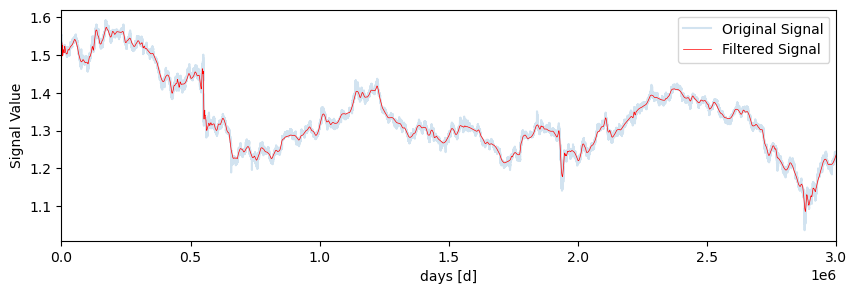

In [31]:
data = pd.read_csv(r'GBPUSD_M1_MT5.csv', sep='\t')
data = data.rename(columns = {'<OPEN>':'open', '<HIGH>':'high', '<LOW>':'low', '<CLOSE>':'close'})

data['open_wave'],data['high_wave'],data['low_wave'],\
data['close_wave'] = denoising([data['open'],data['high'],data['low'],data['close']])

# Replace nulls with the mode
data['close_wave'] = data['close_wave'].fillna(data['close_wave'].mode()[0])
data['close_wave'].isnull().sum() / data['close_wave'].shape[0]*100

fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(data['close'], label="Original Signal", alpha=0.2)
ax.plot(data['close_wave'], label='Filtered Signal', color="red", lw=0.5)
ax.set_xlim(0, 3.0e6)
ax.set_xlabel("days [d]")
ax.set_ylabel("Signal Value")
ax.legend()

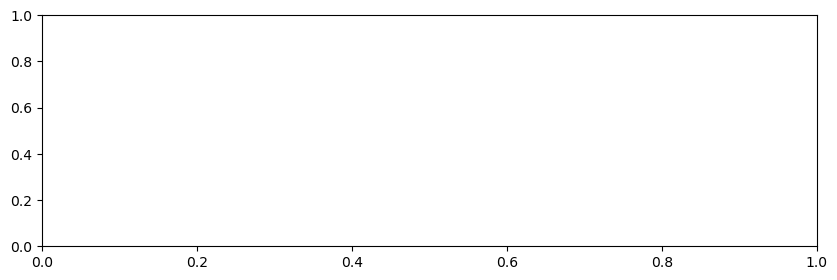

In [12]:
mask = np.where(data['close_wave'] >= 0)

fig, axes = plt.subplots(figsize=(10, 3))
#axes[0].plot(f[mask], np.log(abs(F[mask])), label="Frequency")
